

---
ASSIGNMENT 3 : PART 1


---



In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import read_csv
from scipy import stats
from scipy.spatial import distance

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
from sklearn.manifold import MDS

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Part 1 - Solution #1.**
  
**Definition:** Apriori is a seminal algorithm which uses prior knowledge of frequent itemset. The major property of Apriori is *All nonempty subsets of a frequent itemset must also be frequent.* 

**Explanation:** 

Example for Analysis:

|TID |Items|
|--|--|
|1| Bread, eggs, milk|
|2| Juice, bread , onion|
|3| Juice, eggs, butter, milk|
|4| Juice, bread, butter, milk|
|5| Eggs, butter, milk|

* For the given transaction data, $\{milk\}$ has support of 4/5 = 0.8, inferring that out of 5 transactions, milk was bought 4 times, and $\{butter\}$ has support of $3/5 = 0.6$, inferring that out of 5 transactions butter was bought 3 times.
With the assumption of a support threshold of 0.5, the individual items $\{milk\}$ and $\{butter\}$ are considered as frequent items.
As per the Apriori property if the individual item $\{milk\}$ and $\{butter\}$ are consedered to be frequent itemset then the collective item set $\{milk, butter\}$ would also be considered as frequent. For $\{milk, butter\}$, the support was found to be 3/5 = 0.6, inferring that out of 5 transactions milk,butter was bought 3 times which is more that the support threshold.

* On the other hand, $\{onion\}$ has support of 1/5 = 0.2, inferring that out of 5 transactions, onion was bought only ones. As it is bought only ones and doesn't satisfy the minimum threshold value, any item bought together with onion will not be considered as frequent itemset.

**Conclusion:** Hence the Apriori property of: *All nonempty subsets of a frequent itemset must also be frequent.* gives an advantage in enhancing the efficiency of finding the frequent itemsets. 

---




**Part 1 - Solution #2.**

**Definition:** from Notes 
* Apriori Property : *All nonempty subsets of a frequent itemset must also be frequent.* 
* Apriori employs an iterative approach known as a level-wise search, where k-itemsets are used to explore (k + 1)-itemsets. 
* Apriori has **antimonotonicity** property which says *if a set cannot pass a test, all of its supersets will fail the same test as well.*

**Explanation:** 

* The set of frequent ${k}$-itemsets is denoted by $\mathcal{L}_k$. $\mathcal{L}_1$ denotes the frequent 1-itemset, Apriori uses level-wise scan where algorithm computes the frequency of each item denoted by $\mathcal{L}_1$, this itemset $\mathcal{L}_1$ when satisfies the minimum support threshold, is used to find $\mathcal{L}_2$ and subsequently $\mathcal{L}_2$ is used to find $\mathcal{L}_3$, satisfying the minimum threshold at each level.

* Let $\mathcal{D}$ represent the whole dataset, for a given ${k}$-itemset ${I_k} \in \mathcal{D}$ at level  $\mathcal{L}_k$, if the support or probabality $P(I_k)$ < minimum support threshold, then the itemset $I_{k}$ is not considered as frequent. To calculate the support at next level $\mathcal{L}_{k+1}$, for  ${k+1}$-itemset ${I}_{k+1} \in \mathcal{D}$ the $P(I_{k} \cup {I}_{k+1}  )$ would be same as $P(I_{k})$. As any item bought with a non frequent item set will not be frequent.

**Conclusion:** As the Apriori uses the level wise scan to find the each frequent $k$-itemset and with the property of antimonotonicity only frequent $k$-itemset is used to find frequent $(k+1)$-itemset, Hence, for $k \geq 2$ every frequent $k$-itemset has to be a superset of an itemset in $\mathcal{L}_1$.


---




**Part 1 - Solution #3.**

**Definition:** $\mathcal{A1}$ and $\mathcal{A2}$ are joinable if $\mathcal{l1[j] = l2[j]}$ every $\mathcal{j < k − 1}$ and $\mathcal{l1[k − 1] < l2[k − 1]}$

Given Data: $\mathcal{L}_2 = \{ \{1,2\}, \{1,4\}, \{2, 3\}, \{2, 4\}, \{3, 5\}\}$

**Explanation:** 

$\{1,2\}$ and $\{1,4\}$ are joinable as the fist element $1$ is present in both and element $2$ < element $4$.

$\{2,3\}$ and $\{2,4\}$ are joinable as the fist element $2$ is present in both and element $3$ < element $4$.

**Conclusion:** Candidate Data: $\mathcal{C}_3 = \{ \{1,2,4\}, \{2, 3, 4\}\}$


---

**Part 1 - Solution #4.**

**Definition:**

Support: ${S}_{A \Rightarrow B} = {S}_{A∪B} = \frac{{N}_{A∪B}}{N}$ , depicted as the support of ${S}_{A \Rightarrow B}$ of an association rule ${A ⇒ B}$ is the probability that a transaction drawn from $\mathcal{D}$ contains ${A ∪ B}$.

**Analysis:**

$S_1 = {S}_{\{ \text{boarding pass, passport} \} \Rightarrow \{ \text{flight} \}} = {S}_{boarding pass ∪ passport ∪ flight}$, probabality of all the elements boarding pass, passport and flight.

$S_2 = {S}_{\{ \text{boarding pass} \} \Rightarrow \{ \text{flight} \}} = {S}_{boarding pass ∪ flight}$, probabality of all the elements boarding pass and flight.

As support is the probability that a transaction ${A ∪ B}$ drawn from $\mathcal{D}$. From the above formulation it can deduce that the probabality of $\{boarding pass, passport, flight\}$ would be either same of less than $\{boarding pass, flight\}$. 

Hence, $ S_1 <= S_2 $ 



---



**Part 1 - Solution #5.**

**Definition:**

Support: ${S}_{A \Rightarrow B} = {S}_{A∪B} = \frac{{N}_{A∪B}}{N}$ , depicted as the support ${S}_{A \Rightarrow B}$ for an association rule ${A ⇒ B}$ is the probability that a transaction drawn from $\mathcal{D}$ contains ${A ∪ B}$.

**Explanation:**  ${S}_{\{\} \Rightarrow \{ \text{Eggs} \}}$ mean probability that a transaction drawn from $\mathcal{D}$ contains ${A ∪ B}$. As ${A} = \{\}$ is an empty set and $B = \{\text{Eggs}\}$. The union ${A ∪ B} = {\{\}∪\{Eggs\}} = \{Eggs\}$.


For the transaction dataset used in Section 1 of lab notebook 
the Support : ${S}_{\{\} \Rightarrow \{ \text{Eggs} \}}$ = ${S}_{\{\text{Eggs}\}} = \frac{4}{5} = 0.8$




---


**Part 1 - Solution #6.**





In [32]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

Maximum length of a frequent itemset for the threshold of 0.2.
 
**Analysis:** 

For the above data-set the total number of transaction ${T}$ is 5. For the threshold of 0.2, the k-frequent itemset should have threshold of 0.2 or above, which means that the k-frequent itemset should have been bought together atleast **One time** $(\text{1 out of 5} = 1/5 = 0.2)$. As the maximum number of itemset bought together is 6 in $T_1, T_2, T_5$, hence, the maximum length of a k-frequent item set is **6** with threshold of 0.2.


---



**Part 1 - Solution #7.**

Kulczynski measure of two itemsets $\mathcal{A}$ and $\mathcal{B}$

${K}_{A,B} = \frac {{V}_{A \Rightarrow B} + {V}_{B \Rightarrow A}} {2} $, where ${V}_{A \Rightarrow B}$: Confidence for association rule ${A ⇒ B}$.

Below code calculates the Kulczynski measure for two itemset.

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df,min_support=0,use_colnames=True)
association_rules = association_rules(frequent_itemsets, metric="confidence",min_threshold=0)

In [34]:
def kMeasure (A,B):
  
  antecedent_sele = association_rules['antecedents'] == frozenset(A)
  consequent_sele = association_rules['consequents'] == frozenset(B)
  AB = (antecedent_sele & consequent_sele)
  confAB = association_rules.loc[AB, 'confidence'].item()

  antecedent_sele = association_rules['antecedents'] == frozenset(B)
  consequent_sele = association_rules['consequents'] == frozenset(A)
  BA = (antecedent_sele & consequent_sele)
  confBA = association_rules.loc[BA, 'confidence'].item()

  kMeasure = (confAB + confBA)/2
  display(association_rules.loc[AB])
  display(association_rules.loc[BA])
  print('\n\nkMeasure for the item set A:{0}, B:{1} = {2}'.format(A, B, kMeasure))
  return kMeasure

In [35]:
A = ['Onion']
B = ['Kidney Beans','Eggs']

x = kMeasure(A,B)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
681,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
680,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6




kMeasure for the item set A:['Onion'], B:['Kidney Beans', 'Eggs'] = 0.875




---


**Part 1 - Solution #8.**

Imbalance ratio of two itemsets $\mathcal{A}$ and $\mathcal{B}$

${I}_{A,B} = \frac {|{N}_{A} - {N}_{B}|} {{N}_{A} + {N}_{B} - {N}_{A∪B}} $ , where ${N}$ : support count

Below code calculates the Imbalance ratio for two itemset.

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df,min_support=0,use_colnames=True)
association_rules = association_rules(frequent_itemsets, metric="confidence",min_threshold=0)

In [36]:
def imbalanceRatio (A,B):
  antecedentA = association_rules['antecedents'] == frozenset(A)
  consequentB = association_rules['consequents'] == frozenset(B)
  AB = (antecedentA & consequentB)
  display(association_rules.loc[AB])
  
  supportA = association_rules.loc[AB, 'antecedent support'].item()
  supportB = association_rules.loc[AB, 'consequent support'].item()
  supportAB = association_rules.loc[AB, 'support'].item()
  ratio = (np.abs(supportA -supportB)) / (supportA+supportB-supportAB) 
  print('\n\nImbalance Ratio for the item set {0}, {1} : {2}'.format(A, B, ratio))

  return ratio

In [37]:
A = ['Onion']
B = ['Kidney Beans','Eggs']

x = imbalanceRatio(A,B)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
681,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf




Imbalance Ratio for the item set ['Onion'], ['Kidney Beans', 'Eggs'] : 0.2500000000000001




---
ASSIGNMENT 3 : PART 2


---



**Part 2 - Solution #1.**

From Lecture Notes : Attributes of data objects are divided into two groups and are used in outlier evaluation.<br>
* Contextual attributes: defines the object’s context
* Behavioural attributes: define the object’s characteristics,

For the credit card fraud detection following attributes can be used, a scenario has been mentioned for each categories: 

* Contextual attributes: 
> - Transaction Place(Town,City,State) - if the location of the transaction is far away from the user's home location.
> - Item purchased - If the items purchased are not the usual items bought by the user.

* Behavioural attributes: 
>- Transaction Amount - if the transaction amount is higher than the ususal usage by the user.
>- Mode of Transaction - mode of payment from the card, whether it was swiped or wifi-enabled or used in atm for withdrawal. The user could be only using GPay/PayPal associated with the card. 



---




**Part 2 - Solution #2.**

For University of Wisconsin breast cancer dataset: 

**Analysis:**
The cancer dataset has feature defined as Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, Mitoses. The data set also has a Class feature that define whether the case is benign or malignant. 
The outlier detection could be carried out w.r.t to individual feature or whole dataset to classify the outliers.

**Statistical Approaches with Parametric Method** would be used to detect the outliers in this case.

**Examples:**
* Parametric model Maximum likelihood method can be used to calculate the mean $μ$ and Standard deviation $σ$ for the univariate features and estimate the outlier based on extreme value of the individual feature. For e.g. To find outliers based on only one feature 'Bare Nuclei'.

* Multivariate outlier detection using multiple parametric distributions could be used to detect the outliers. For this process it's assumed that the data has normal distribution. For any object $o$ the probablity that object $o$ either belongs to the mixture of the dataset, can be denoted by $Pr(o|Θ_1,Θ_2) = f_{Θ_1} + f_{Θ_2} $ where $f_{Θ_1},f_{Θ_2}$ are density function of individual cluster. For e.g. in the Cancer dataset there are two clases of data benign or malignant. To find outlier based on all the feature from both the cluster of data this method could be used. Density function $f_{Θ}$ can be calculated for each of the class and any object $o$, is detected as an outlier if the probability is very low or does not belong to the sum of each density or does not satisfy the equation.


---






**Part 2 - Solution #3.**

The maximum likelihood method is used to estimate the parameters mean: $μ$ and standard deviation: $σ$ for the univariate feature. 
For a normal distribution $μ \pm 3σ$ region contains 99.7% data. Hence, for any feature, if the probablity of it's  difference from the mean over the standard deviation is found to be greater that 3 is considered as an outlier.  

  * $μ = \bar{x} = \sum_{i=1}^{n}x_i $ <br>

  * $\sigma^2 =\frac{1}{n} \times \sum_{i=1}^{n}(x_i-\bar{x})^2$

The below code shows the implementation of finding outlier for a given univariate feature.

In [46]:
XTemp = np.array([22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82])
# Mean value of the Temp List 
meanTemp = np.mean(XTemp)
# Standard Deviation value of the Temp List 
sd = np.std(XTemp)
print('Mean: {0}, Standard Deviation: {1}'.format(meanTemp, sd))

# Difference of the individial temp from the mean
difference = XTemp - meanTemp
# Probablity of the individial temp
probability = np.abs(difference/sd)
print('Probabality of each Temperature: {0}'.format(probability))
indexes = np.where(probability > 3)[0]
print('Outlier found from the list: {0} '.format((XTemp[:][indexes]).item()))

Mean: 22.534999999999997, Standard Deviation: 6.130045540885756
Probabality of each Temperature: [0.06443672 0.30097656 0.52446592 0.21288586 0.45758224 3.14597989
 0.16557789 0.93718716 0.19331015 0.01876006 0.70064732 0.20962324]
Outlier found from the list: 3.25 


---
**Part 2 - Solution #4.**

One-Class SVM is used to estimate the outliers for the Stock Dataset. 

**Analysis:** OneClassSVM-One Class Support Vector Machine classifier creates a linear or a non-linear boundry around the dataset to differenciate between the inliner and outliers. The **nu** or $ν$ parameter defines the upper boundry fraction of outliers to be taken into consideration. For this exercise the required parameter gamma and kernel are kept as default as the dataset is non-linear. 

The below code shows the implementation:



In [47]:
# Load CSV file, set the 'Date' values as the index of each row, and display the first rows of the dataframe
stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)

N,d = stocks.shape
# Compute delta, which denotes the percentage of changes in the daily closing price of each stock
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)

In [48]:
# Estimate the outliers in the dataset using the one-class SVM
svmClassifier1 = OneClassSVM(nu=0.1).fit(delta.values)
svmClassifier2 = OneClassSVM().fit(delta.values)
yPred = svmClassifier1.predict(delta.values)
yPred2 = svmClassifier2.predict(delta.values)

yPred_class = pd.DataFrame(yPred, index=delta.index, columns=['Class(0.1)'])
yPred_class2 = pd.DataFrame(yPred2, index=delta.index, columns=['Class(0.5)'])

result = pd.concat((delta,yPred_class,yPred_class2), axis=1)
display(result.sort_values('Class(0.1)').head())
print('Total count of Data: {0}'.format(len(result)))
print('Outlier Count when nu=0.1: {0}'.format(len(result.loc[result['Class(0.1)'] == -1])))
print('Outlier Count when nu=0.5: {0}'.format(len(result.loc[result['Class(0.5)'] == -1])))

,MSFT,F,BAC,Class(0.1),Class(0.5)
Date,,,,,
7/24/2008,-3.745740,-15.257048,-8.373206,-1,-1
2/24/2009,-0.232417,15.606936,20.971867,-1,-1
2/25/2009,-1.223069,0.500000,9.090909,-1,-1
2/26/2009,-3.183957,-1.492537,3.100775,-1,-1
2/27/2009,-1.644336,1.010101,-25.751880,-1,-1


Total count of Data: 2517
Outlier Count when nu=0.1: 249
Outlier Count when nu=0.5: 1259


In the implementation two variation of SVM are implemented for analysis. In the scattered plot it can be inferred that red dots(classified:1) are inliners and blue dots (Classified:-1)are outliers.

* svmClassifier1 : $ν=0.1$ About whole cluster of dataset is considered as inliners (Red Color) and about 10% of the data are considered as outliers. 
* svmClassifier2 : $ν=0.5$, about 50% of the data are considered to be outliers.

**Analysis:**

* The OneclassSVM uses **rbf**(Radial basis function) kernel method by default to distinguish between the inliner and outliers, where the **gamma** and **nu** are provided as the radial and upper boundry of fraction of outlier to be taken into consideration. The percentage of outliers found by OneclassSVM depends on the **nu** or $ν$ value.

* On the other hand in the labnote, Parametric model used is the Mahalanobis distance, where for a multivariate dataset, the distance between the each object is estimated by $ MDist(o-\bar{o})$. This distance $MDist$ is then considered as univariate dataset to calculate the outliers. The percentage of outliers are decided based on the chosen outlier score. 

* Moreover, Proximity-based method used the concept of k-nearest neighbour and the outliers are estimated based in the distance between the dataset where for an object the proximity of K-nearest neighour classifies whether the other object is outlier. In this scenario the percentage of the outlier are decided by the knn value.   


Below code shows the graphical implementation for the OneclassSVM Model. 

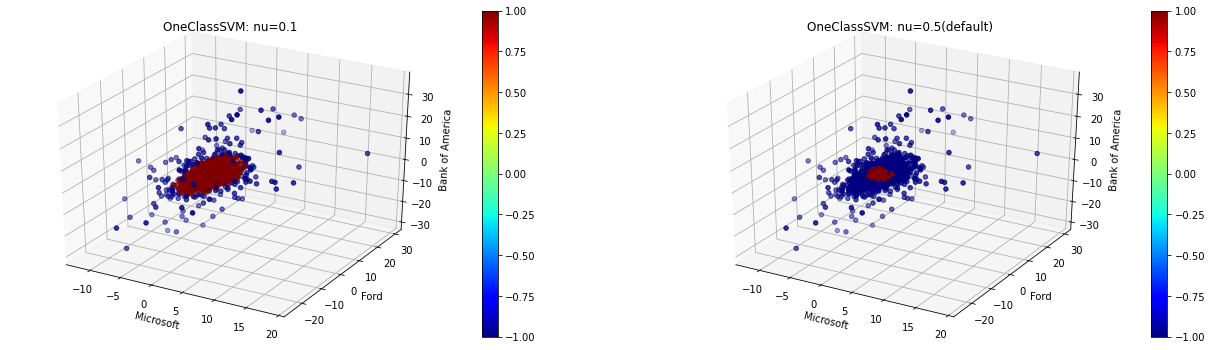

In [49]:
# Display 3D scatterplot with datapoints having a different color according to their outlier score
fig = plt.figure(figsize=(22,6))

ax = fig.add_subplot(121, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=yPred,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
plt.title('OneClassSVM: nu=0.1')
fig.colorbar(p)

ax1 = fig.add_subplot(122, projection='3d')
p1 = ax1.scatter(delta.MSFT,delta.F,delta.BAC,c=yPred2,cmap='jet')
ax1.set_xlabel('Microsoft')
ax1.set_ylabel('Ford')
ax1.set_zlabel('Bank of America')
plt.title('OneClassSVM: nu=0.5(default)')
fig.colorbar(p1)

plt.show()

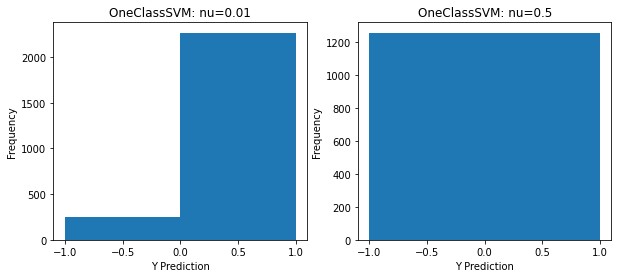

In [50]:
# Display a histogram for the frequencies of the estimated outlier and inlier labels.
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121)
ax.hist(yPred, bins=2)
ax.set_xlabel('Y Prediction')
ax.set_ylabel('Frequency')
plt.title('OneClassSVM: nu=0.01')

ax = fig.add_subplot(122)
ax.hist(yPred2, bins=2)
ax.set_xlabel('Y Prediction')
ax.set_ylabel('Frequency')
plt.title('OneClassSVM: nu=0.5')

plt.show()

---

**Part 2 - Solution #5.**

The below code use the house Dataset, following implmentation are done⏰
- Zscore normalization of the feature.
- Dimensionality reduction on the dataset using PCA with 2 principal components.
- Outlier detection on the dataset using the k-nearest neighbours approach using k=2. 
- Scatterplot of the two principal components, where each object is colour-coded according to the computed outlier score.

In [51]:
# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)

# Extracting the values from the dataframe
data = df.values

# Split dataset into input and output elements
X, y = data[:, :-1], data[:, -1]

In [52]:
# Summarize and standardise the dataset
print(X.shape, y.shape)
standardised = stats.zscore(X)
print(standardised.shape)

## perform PCA 
embedding = MDS(n_components=2)
Xp = embedding.fit_transform(standardised)
df_projection = pd.DataFrame({'pc1': Xp[:, 0], 'pc2': Xp[:, 1]})
df_projection['MEDV'] = y
print(df_projection)


(506, 13) (506,)
(506, 13)
          pc1       pc2  MEDV
0   -2.443040  0.343712  24.0
1   -1.251901  0.542023  21.6
2   -2.274225  0.281070  34.7
3   -2.671933  0.798524  33.4
4   -2.606002  0.599575  36.2
..        ...       ...   ...
501 -0.474931 -0.502613  22.4
502  0.002055 -0.212955  20.6
503  0.885784  1.152665  23.9
504 -0.809995 -1.022259  22.0
505 -0.022760 -0.243196  11.9

[506 rows x 3 columns]


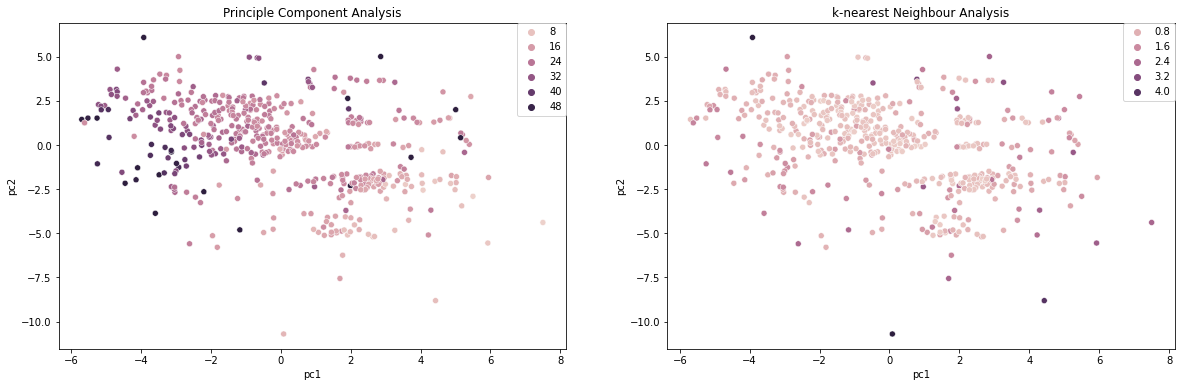

In [53]:
delta = df_projection

# Implement a k-nearest neighbour approach using k=4 neighbours
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(delta.values)
distances, indices = nbrs.kneighbors(delta.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]
delta['outlier_score']=outlier_score

# Plot 3D scatterplot of outlier scores
fig = plt.figure(figsize=(20,6))
## Scatter plot for PCA
ax = fig.add_subplot(121)
sns.scatterplot(x='pc1', y='pc2', hue='MEDV', data=df_projection)
plt.title('Principle Component Analysis')
plt.legend(bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.)

ax = fig.add_subplot(122)
sns.scatterplot(x='pc1', y='pc2', hue='outlier_score', data=delta)
plt.title('k-nearest Neighbour Analysis')
plt.legend(bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.)
plt.show()